In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from util.utils import tradex_features, convert_df
import os
import pickle

symbol= 'BTC/USDT'
procent= 1

# Sample indicator data in a Pandas DataFrame (you should replace this with your actual data)
def _get_data():
    # self.config['Path']['2020_30m_data']
    pickle_file_name = 'data/pickle/all/30m_data_all.pkl'

    if not os.path.exists(pickle_file_name):
        print('No data has been written')
        return pd.DataFrame()  # Return an empty DataFrame instead of None for consistency

    with open(pickle_file_name, 'rb') as f:
        data_ = pickle.load(f)

    if data_.empty:
        print("Loaded data is empty.")
        return pd.DataFrame()

    data = convert_df(data_)

    if data.empty or data.isnull().values.any():
        print("Converted data is empty or contains NaN values.")
        return pd.DataFrame()

    # float(self.config['Data']['percentage'])
    percentage_to_keep = procent / 100.0
    rows_to_keep = int(len(data) * percentage_to_keep)
    data = data.head(rows_to_keep)

    print(f'Dataframe shape: {data.shape}')
    return data


Dataframe shape: (653, 5)
Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')


f:\Project\Programming\own\python\tradingApp\model\features.py:409: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9.76940627e+10 1.02842874e+11 8.01610420e+10 8.83911190e+10
 2.42738190e+10 2.40906837e+10 3.70901996e+10 2.56810383e+10
 5.74798929e+10 4.33704534e+10 1.99311284e+10 7.97436985e+10
 6.10864357e+10 6.47078620e+10 3.80535667e+10 5.71029812e+10
 7.45436234e+10 3.52292097e+10 1.85399656e+11 5.87025355e+10
 8.41400214e+10 3.92785950e+10 3.79564306e+10 5.84077136e+10
 3.79148753e+10 1.71876412e+11 6.87480326e+10 3.58388322e+10
 1.43766745e+11 1.18361208e+11 7.35499776e+10 8.67473852e+10
 1.57027121e+11 6.83309230e+10 3.33848634e+10 9.00293393e+10
 1.13966326e+11 1.06824046e+11 9.97413971e+10 1.07587061e+11
 4.42943566e+10 6.29677956e+10 2.87170976e+10 5.83299001e+10
 6.11251608e+10 2.42924403e+11 1.58498942e+11 6.28612612e+10
 4.09783659e+11 1.19103184e+12 3.59888599e+11 1.75680374e+11
 1.49999642e+11 1.181

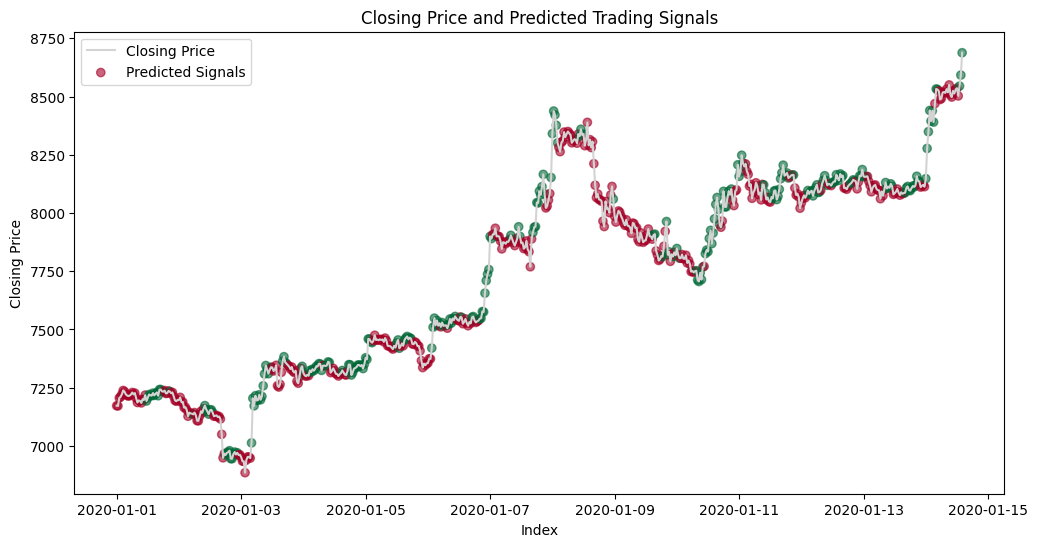

In [31]:
df = tradex_features(symbol,_get_data())
# Define a target variable (e.g., Buy: 1, Sell: -1, Hold: 0) based on your strategy
df['Signal'] = np.where(df['l_wave'] > df['b_wave'], 1, 0)  # A simple example, replace with your logic

# Split data into features (X) and target (y)
X = df[['l_wave', 'b_wave']]
y = df['Signal']

# Train a decision tree classifier (you should replace this with your model)
model = DecisionTreeClassifier()
model.fit(X, y)

# Generate predictions on the dataset
df['Predicted_Signal'] = model.predict(X)

# Visualize the closing price and predicted signals
plt.figure(figsize=(12, 6))

# Plot the closing price
plt.plot(df.index, df['close'], label='Closing Price', color='lightgray')

# Scatter plot for predicted signals
# Color-code the scatter plot based on the predicted signal
plt.scatter(df.index, df['close'], c=df['Predicted_Signal'], cmap='RdYlGn', label='Predicted Signals', alpha=0.6)

plt.title('Closing Price and Predicted Trading Signals')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
# Example DataFrame
# trade_x = pd.read_csv('your_data.csv')  # If you have data in a CSV file

# Generate a simple target variable: 1 if the price goes up, 0 if it goes down
df['target'] = np.where(df['close'].shift(-5) > df['close'], 1, 0)

# Drop rows with missing values
df.dropna(inplace=True)


In [34]:
# Select features and target
X = df[['l_wave', 'b_wave']]  # Add more features if necessary
y = df['target']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Using a Random Forest Classifier as an example
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.4945054945054945


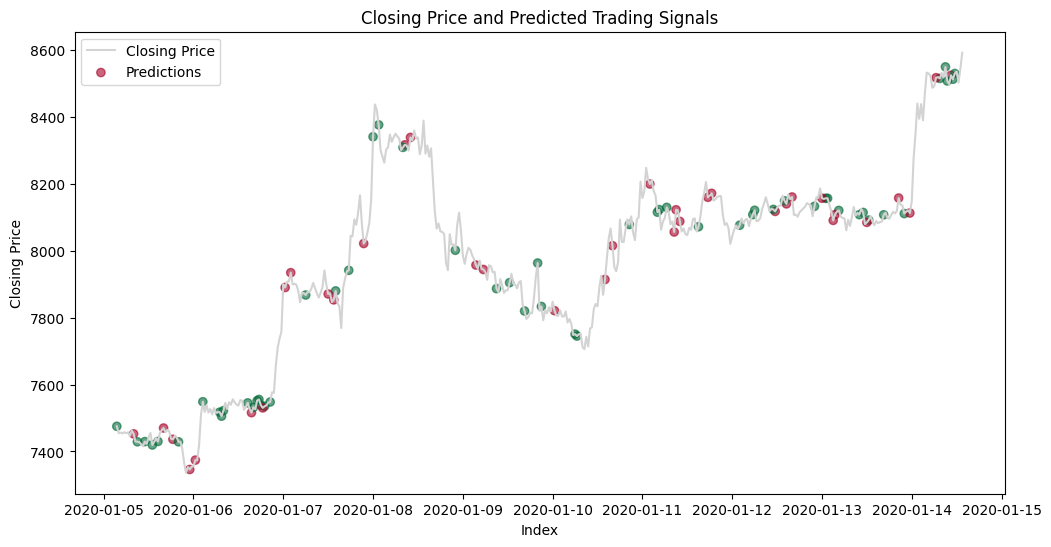

In [38]:
plt.figure(figsize=(12, 6))

# Plot the closing price
plt.plot(df.index, df['close'], label='Closing Price', color='lightgray')

# Scatter plot for actual and predicted
# Note: We need to align the indices of X_test and y_test to get the correct dates
aligned_X_test = df.loc[X_test.index]
plt.scatter(aligned_X_test.index, aligned_X_test['close'], c=predictions, cmap='RdYlGn', label='Predictions', alpha=0.6)

plt.title('Closing Price and Predicted Trading Signals')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

